파이썬으로 stack, queue, linkedlist 구현

https://velog.io/@kyunghwan1207/%EC%9E%90%EB%A3%8C%EA%B5%AC%EC%A1%B0Python%EC%9C%BC%EB%A1%9C-Stack-Queue-LinkedList-%EA%B5%AC%ED%98%84-bmpk4w1l

자료구조 파이썬

https://wikidocs.net/192533




ADT(Abstract Data Types) 추상 데이터 타입.

- 데이터 타입의 정의가 그 데이터 타입의 구현으로부터 분리 된 데이터 타입

사용자들은 추상 데이터 타입이 제공하는 연산만을 사용. 캡슐화 개념(사용자들은 추상 데이터 타입의 내부에 접근할 수 없음) 


- 필요성:

    해당 데이터 타입이 어떠한 object들과 function으로 이루어져 있는지 명시해 둔 사용설명서-> 외부는 공개적

    구현 부분을 나타내지 않기 때문에 내부는 비공개적 ==> 정보은닉

    사용자는 사용법만 알면 그 내부는 몰라도 해당 데이터 타입을 쉽게 사용 가능.

    Data type : object + functions


Data Structure

- ADT를 프로그래밍 언어로 구현한 것. 호율적인 접근, 수정을 가능케 하는 자료의 조직, 관리, 저장 의미

- 여러 종류가 있고 각각의 자료구조는 각자의 연산 및 목적에 특화

- stack, queue, linkenlist, B-tree(database), routing table(network)





# Queue 큐!

- 선형구조. 앞에선 삭제만(deQueue), 뒤에서는 삽입(enQueue)만 이루어짐

- FIFO

- 종류: 선형큐, 원형큐, 우선순위큐


**큐의 주요 연산**

- enQueue : 큐의 마지막에 원소를 삽입하는 연산

- deQueue : 큐의 제일 앞에서 원소를 삭제하고 반환

- createQueue : 공백 상태의 큐를 생성하는 연산

- isEmpty : 큐가 공백상태인지를 확인하는 연산

- isFull : 큐가 포화상태인지를 확인하는 연산

- Qpeek : 큐의 가장 앞의 원소를 삭제 없이 반환

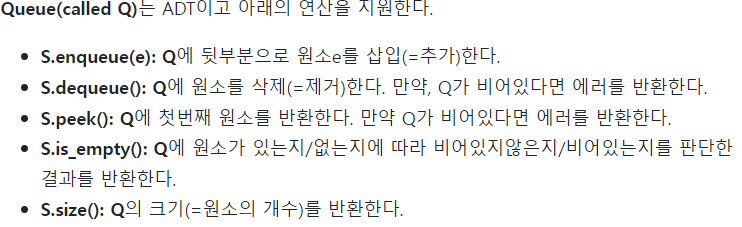



In [ ]:
# Python의 list자료구조를 통해 FIFO로 동작하는 Queue구현
class QueueADT:
    # 비어있는 Queue생성
    def __init__(self):
        self.data = []
 
    # Q에 뒷부분으로 원소e를 삽입(=추가)한다.
    def enqueue(self, e):
        self.data.insert(0, e)
 
    # Q에 원소를 삭제(=제거)한다. 
    # 만약, Q가 비어있다면 에러를 return
    def dequeue(self):
        if self.is_empty():
            raise IndexError('Queue is empty')
        else:
            return self.data.pop()
 
    # Q에 첫번째 원소를 return
    # 만약 Q가 비어있다면 에러를 return
    def peek(self):
        if self.is_empty():
            raise IndexError('Queue is empty')
        else:
            return self.data[-1]
 
    # Q가 비어있다면 True를 return
    def is_empty(self):
        return len(self.data) == 0
 
    # Q의 크기를 return
    def size(self):
        return len(self.data)
 
 
Q = QueueADT()
Q.enqueue("Q")
Q.enqueue("U")
Q.enqueue("E")
Q.enqueue("U")
Q.enqueue("E")
Q.peek()         # Q
Q.size()         # 5
Q.is_empty()     # False
Q.dequeue()      # Q
Q.dequeue()      # U
Q.dequeue()      # E
Q.dequeue()      # U
Q.dequeue()      # E
Q.is_empty()     # True
Q.size()         # 0
Q.peek()         # IndexError: Queue is empty

### 큐의 연산 과정

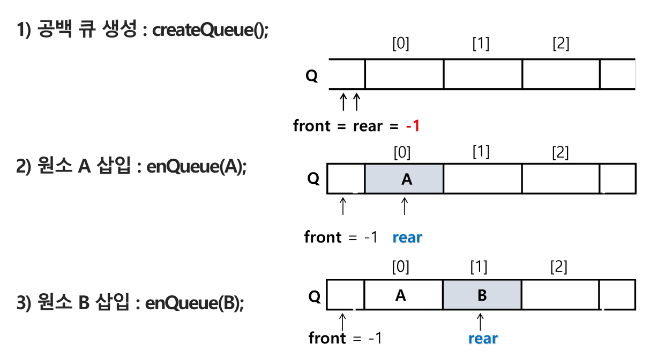

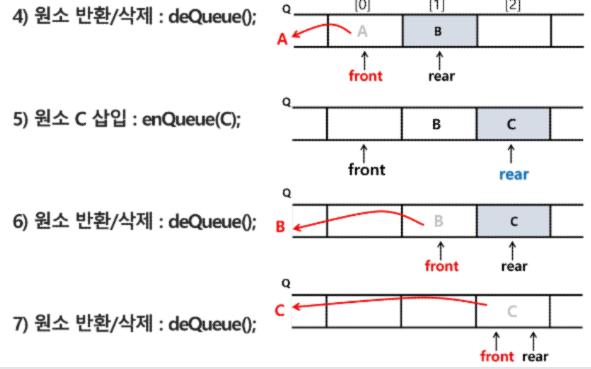

원소 삽입시 rear +1 하고 삽입. rear는 마지막 원소가 들어가있는 자리

원소 추출시 front +1 하고 추출. front는 결과적으로 비어있는 상태가 됨

### 큐의 구현

**선형 큐**

- 1차원 배열을 이용한 큐

 큐의 크기 = 배열의 크기

 front : 저장된 첫 번째 원소의 인덱스

 rear : 저장된 마지막 원소의 인덱스

- 상태 표현

 초기 상태 : front = rear = -1

 공백 상태 : front == rear

 포화 상태 : rear == n-1 (n:배열의 크기, n-1: 배열의 마지막 인덱스)


- 초기 공백 큐 생성

 크기가 n인 1차원 배열 생성, front, rear를 -1로 초기화


**enQueue**

- 마지막 원소 뒤에 새로운 원소를 삽입하기 위해 
    
    1) rear 값을 하나 증가시켜 새로운 원소 삽입할 자리 마련
    
    2) 그 인덱스에 해당하는 배열원소 Q[rear]에 item 저장

    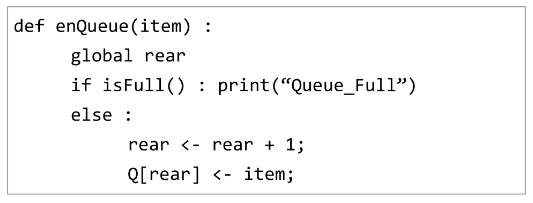


**deQueue**

- 가장 앞에 있는 원소를 삭제하기 위해
    
    1) front 값을 증가시켜 큐에 남아있게 될 첫 번째 원소 이동

    2) 새로운 첫 번째 원소를 리턴함으로써 삭제와 동일한 기능

    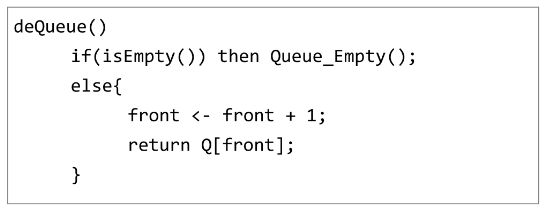


**isEmpty, isFull 공백상태 및 포화상태 검사**

    - 공백상태 : front == rear

    - 포화상태 : rear = n-1 (n : 배열의 크기, n-1 : 배열의 마지막 인덱스)

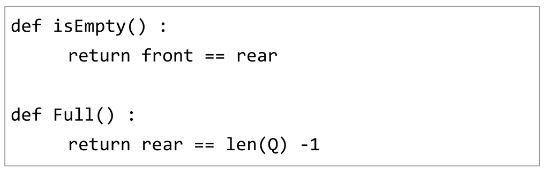

**Qpeek 검색**

 - 가장 앞에 있는 원소를 검색하여 반환

 - 현재 front의 한자리 뒤(front+1)에 있는 원소(큐의 첫번째에 있는 원소)반환

 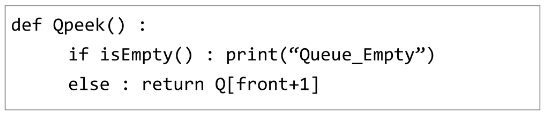

 

**선형 큐 이용시의 문제점**

- 잘못된 포화상태 인식

 배열의 앞부분에 활용할 수 있는 공간이 있음에도 불구하고, rear = n-1인 상태 즉 포화상태로 인식하여 더이상의 삽입을 수행하지 않게 됨

 --> 매 연산이 이루어질 때 마다 저장된 원소들을 앞으로 땡긴다.
 
 --> 원소 이동에 많은 시간이 소요되어 큐의 효율성 급락

 --> 1차원 배열을 사용하되, 논리적으로는 배열의 처음과 끝이 연결되어 원형형태의 큐를 이룬다고 가정하고 사용.

**원형 큐의 구조**

 - 초기 공백 상태: front = rear = 0


 - index의 순환

  fornt와 rear의 배치가 배열의 마지막 인덱스인 n-1를 가리킨 후, 그 다음엔 논리적 순환을 이루어 배열의 첫 번째 인덱스로 이동해야 함

  나머ㅈ지 연산자 mod 사용

  - front 변수

    공백 상태와 포화 상태 구분을 쉽게 하기 위해 front는 사용X, 빈자리로 둠.
    queue의 front는 배열에 들어있는 첫 번째 원소의 인덱스 -1

    공백임을 판단하기 위해 front의 위치와 rear의 위치를 매번 계산할 것 없이 front 를 공백 위치에 두어 쉽게 판단하도록 하기 위해 사용


    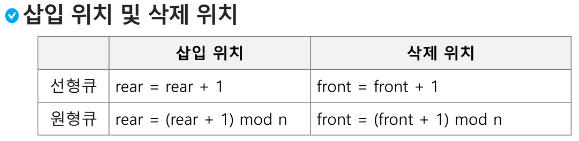

  선형큐 삽입 : rear = rear + 1 삭제 : front: front + 1
  원형큐 삽입 : rear = (rear + 1) mod n 삭제 : front : (front + 1) mod n

**원형 큐의 연산 과정**

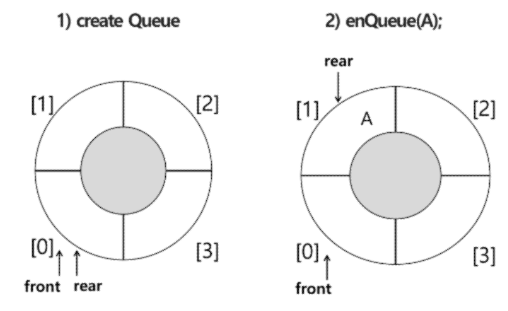

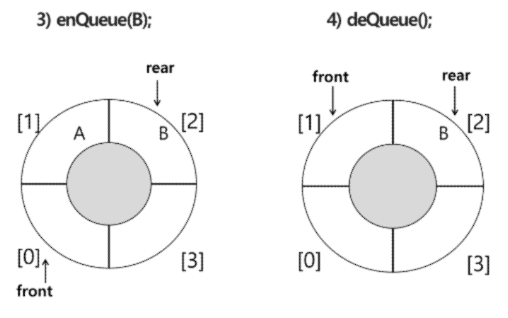

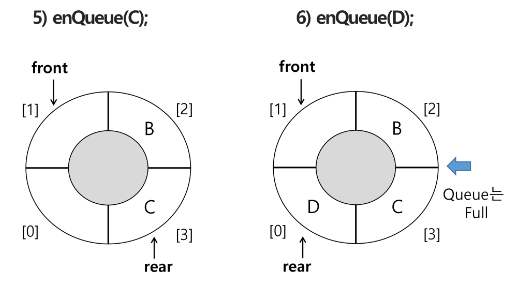


**원형 큐의 구현**

- 초기 공백 큐 생성

    크기 n인 1차원 배열 생성

    front와 rear를 0으로 초기화

**원형 큐의 구현**

- inEmpty(), isFull() 공백상태 및 포화상태 검사

    공백상태 : front == rear

    포화상태 : 삽입할 rear의 다음 위치 == 현재 front
    
    -(rear + 1)mod n == front

    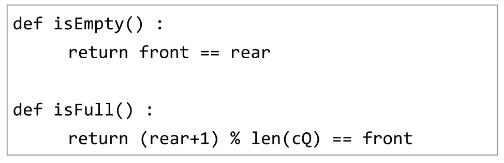


- enQueue(item)  삽입

    마지막 원소 뒤에 새로운 원소를 삽입하기 위해
    
    1) rear 값 조정해 새로운 원소를 삽입할 자리를 마련함

        rear <- -(rear + 1)mod n
    
    2) 그 인덱스에 해당하는 배열원소 cQ[rear]에 item을 저장

    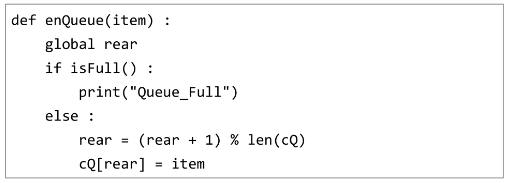


- deQueue(), delete 삭제

    가장 앞에 있는 원소를 삭제하기 위해서,

    1) front 값 조정, 삭제할 자리 준비

    2) 새로운 front 원소를 리턴, 삭제와 동일한 기능

    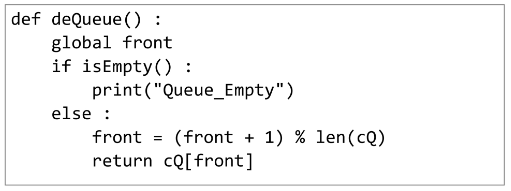

    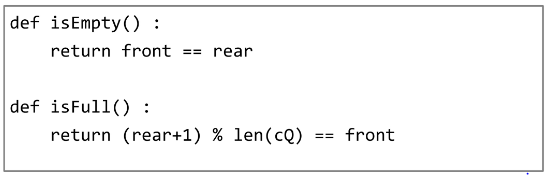


    front == rear -> 빈 큐
    
    front + 1 == rear -> 가득 참
    

### 우선순위 큐 Priority Queue

- 특성: 우선순위를 가진 항목들을 저장함. FIFO가 아니라 우선순위가 높은 순서대로 먼저 출력

- 적용: 시뮬레이션 시스템, 네트워크 트래픽제어, 운영체제의 테스크 스케쥴링

- 구현: 배열을 이용/리스트를 이용

- 연산: enQueue, deQueue

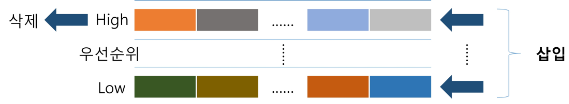

**배열을 이용한 우선순위 큐**

    배열 이용. 원소 삽입 과정시 우선순위를 비교해 적절한 위치에 삽입. 가장 앞에 최고 우선순위의 원소 위치.

    - 문제점: 배열 사용. 삽입, 삭제 연산시 원소의 재배치 발생. --> 메모리 소요, 낭비

### 큐의 활용

**버퍼**

    데이터를 한 곳에서 다른 한 곳으로 전송하는 동안 일시적으로 그 데이터를 보관하는 메모리의 영역
    
    버퍼링: 버퍼를 활용하는 방식, 버퍼를 채우는 동작 의미

**버퍼의 자료 구조**

    일반적으로 입출력 및 네트워크와 관련된 기능에서 이용

    순서대로 입력/출력/전달되어야 하므로 FIFO 방식의 자료구조인 큐 활용

    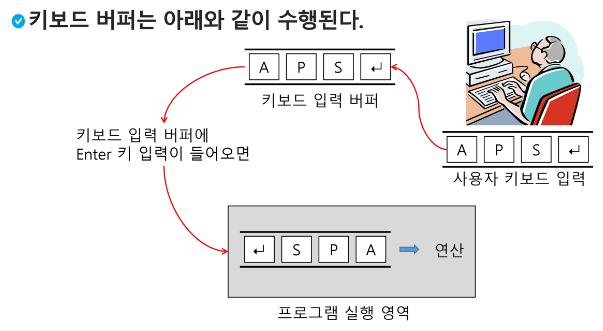

**큐 뒤집기**

- 스택을 이용

    스택은 FILO 구조이기 때문에 큐가 빌 때 까지 자료를 꺼내 스택에 넣었다가 스택이 빌 때까지 자료를 꺼내서 큐에 넣으면 큐의 순서를 뒤집을 수 있음


In [ ]:
# 큐 뒤집기
def reverse_queue(q):
    s = []
    while not q.is_empty():
        s.append(q.dequeue())
    while s:
        q.enqueue(s.pop())


# 큐의 상태를 출력하는 함수
def display(q):
    node = q.front
    while node:
        print(node.data, end = " ")
        node = node.next
    print()

q = Queue()
for i in range(5):
    q.enqueue(i)
display(q)
reverse_queue(q)
display(q) 

- 재귀 사용

    재귀 함수는 큐가 비면 종료. 큐가 빌 때까지 반복하는 방법.
    
    자료를 하나 꺼내서 변수에 보관, 자신을 호출해 자료를 또 꺼내고 큐에 자료를 넣는 방법.

    스택이랑 비슷한거 아닌가?

    재귀함수가 호출될 때 마다 dequeue한 값을 가지고 있다가 재귀 함수 종료 시점에 다시 enqueue 하는 게 스택을 활용한 것과 같음.

In [ ]:
def reverse_queue_recursive(q):
    if not q.is_empty():
        data = q.dequeue()
        reverse_queue_recursive(q)
        q.enqueue(data)

In [ ]:
# 원형 큐 구현해보기

size = 10
cq = [0] * size
front = rear = 0

# 원소를 입력하는 함수
def enQue(item):
    global rear
    # 큐가 가득 차있는지 먼저 확인
    if isFull(): # True: 큐가 가득 차 있음
        print("Full")
        return
    rear += 1
    cq[rear] = item


def isFull():
    return front == (rear + 1) % size

# 원소를 추출하는 함수
def deQue():
    global front
    # 큐에 원소가 남아있는지 먼저 확인
    if isEmpty(): # True : 큐가 비어있음
        print("Empty")
        return
    front += 1
    return cq[front]


def isEmpty():
    return rear == front

for i in range(10):
    enQue(i)

print(cq)
print(isEmpty())
print(isFull())

for i in range(10):
    print(deQue(), end = " ")
print()

print(cq)
print(isEmpty())
print(isFull()) 
## isFull 이거 결과가 자꾸 True 나와서 뭐지 했는데 생각해보니 여기는 rear랑 front 를 늘리기만 하지
## 줄여주는 과정은 없었다. 그래서 선형 큐를 사용하면 앞으로 정렬하는 과정이 추가로 필요했고
## 그 과정을 우리가 굳이 배우지 않은 것은 그렇게 사용하면 너무 낭비가 심해서인것 같다.
## 그래서 그냥 원형 큐를 사용하는 방법이 이용되고있다~~~~~~~
